## BLACKFRIYDAY REGREESION PROJECT

In [1]:

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from dython.nominal import associations
import statsmodels.api as sm
import datetime, scipy
import re
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import string
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler
np.set_printoptions(suppress=True)
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import glob, os
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

#### IMPORT DATASET

In [2]:
train = pd.read_csv('train.csv')
train.head(5)

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
train.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [5]:
cat_columns = [f for f in train.columns if train.dtypes[f] == 'object']
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [6]:
num_columns = [f for f in train.columns if train.dtypes[f] != 'object']
num_columns

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

#### IS THERE DUPLICATED ROWS OR NOT?

In [7]:
train.User_ID.nunique

<bound method IndexOpsMixin.nunique of 0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: User_ID, Length: 550068, dtype: int64>

In [8]:
train=train.drop(['User_ID','Product_ID'], axis=1)

In [9]:
# Transforming Order to Categorical variables
for label, content in train.items():
    if pd.api.types.is_string_dtype(content):
        train[label] = content.astype("category").cat.as_ordered() 
train['Occupation']=train['Occupation'].astype("category")
train['Marital_Status']=train['Marital_Status'].astype("category")

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Gender                      550068 non-null  category
 1   Age                         550068 non-null  category
 2   Occupation                  550068 non-null  category
 3   City_Category               550068 non-null  category
 4   Stay_In_Current_City_Years  550068 non-null  category
 5   Marital_Status              550068 non-null  category
 6   Product_Category_1          550068 non-null  int64   
 7   Product_Category_2          376430 non-null  float64 
 8   Product_Category_3          166821 non-null  float64 
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), float64(2), int64(2)
memory usage: 19.9 MB


#### MISSING VALUE

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


<AxesSubplot:>

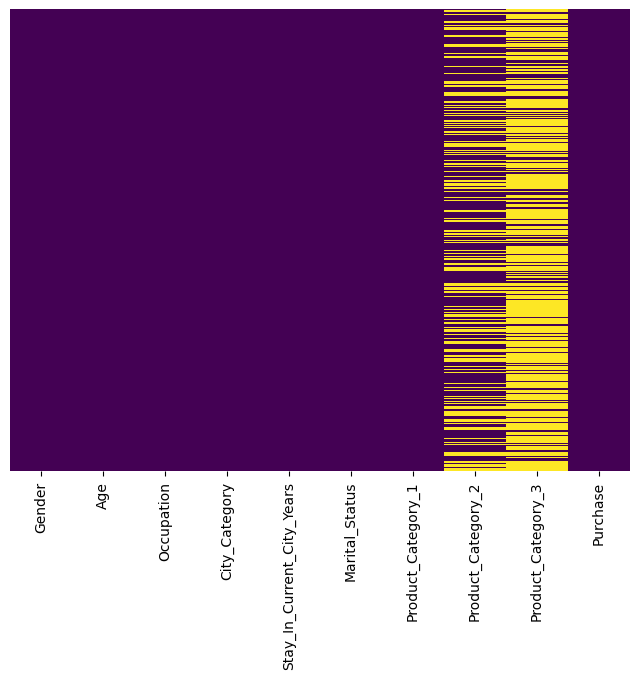

In [11]:
print(train.isnull().sum())

# to see missing value using visualisation
plt.figure(figsize=(8,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
train_drop=train.copy()

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')

train_drop['Product_Category_2']= imputer.fit_transform(train_drop[['Product_Category_2']])

In [14]:
train_drop['Product_Category_3']= imputer.fit_transform(train_drop[['Product_Category_3']])

In [15]:
train_drop.head()

Gender   Age Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17         10             A                          2   
1      F  0-17         10             A                          2   
2      F  0-17         10             A                          2   
3      F  0-17         10             A                          2   
4      M   55+         16             C                         4+   

  Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0              0                   3            9.842329           12.668243   
1              0                   1            6.000000           14.000000   
2              0                  12            9.842329           12.668243   
3              0                  12           14.000000           12.668243   
4              0                   8            9.842329           12.668243   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969

In [16]:
train_drop['Product_Category_3'].isnull().sum()

0

In [17]:
train_drop['Product_Category_2'].isnull().sum()

0

### EXPLONATORY DATA ANALYSIS

#### Univariate Data Analysis

#### HISTOGRAM OF ALL VARIABLES

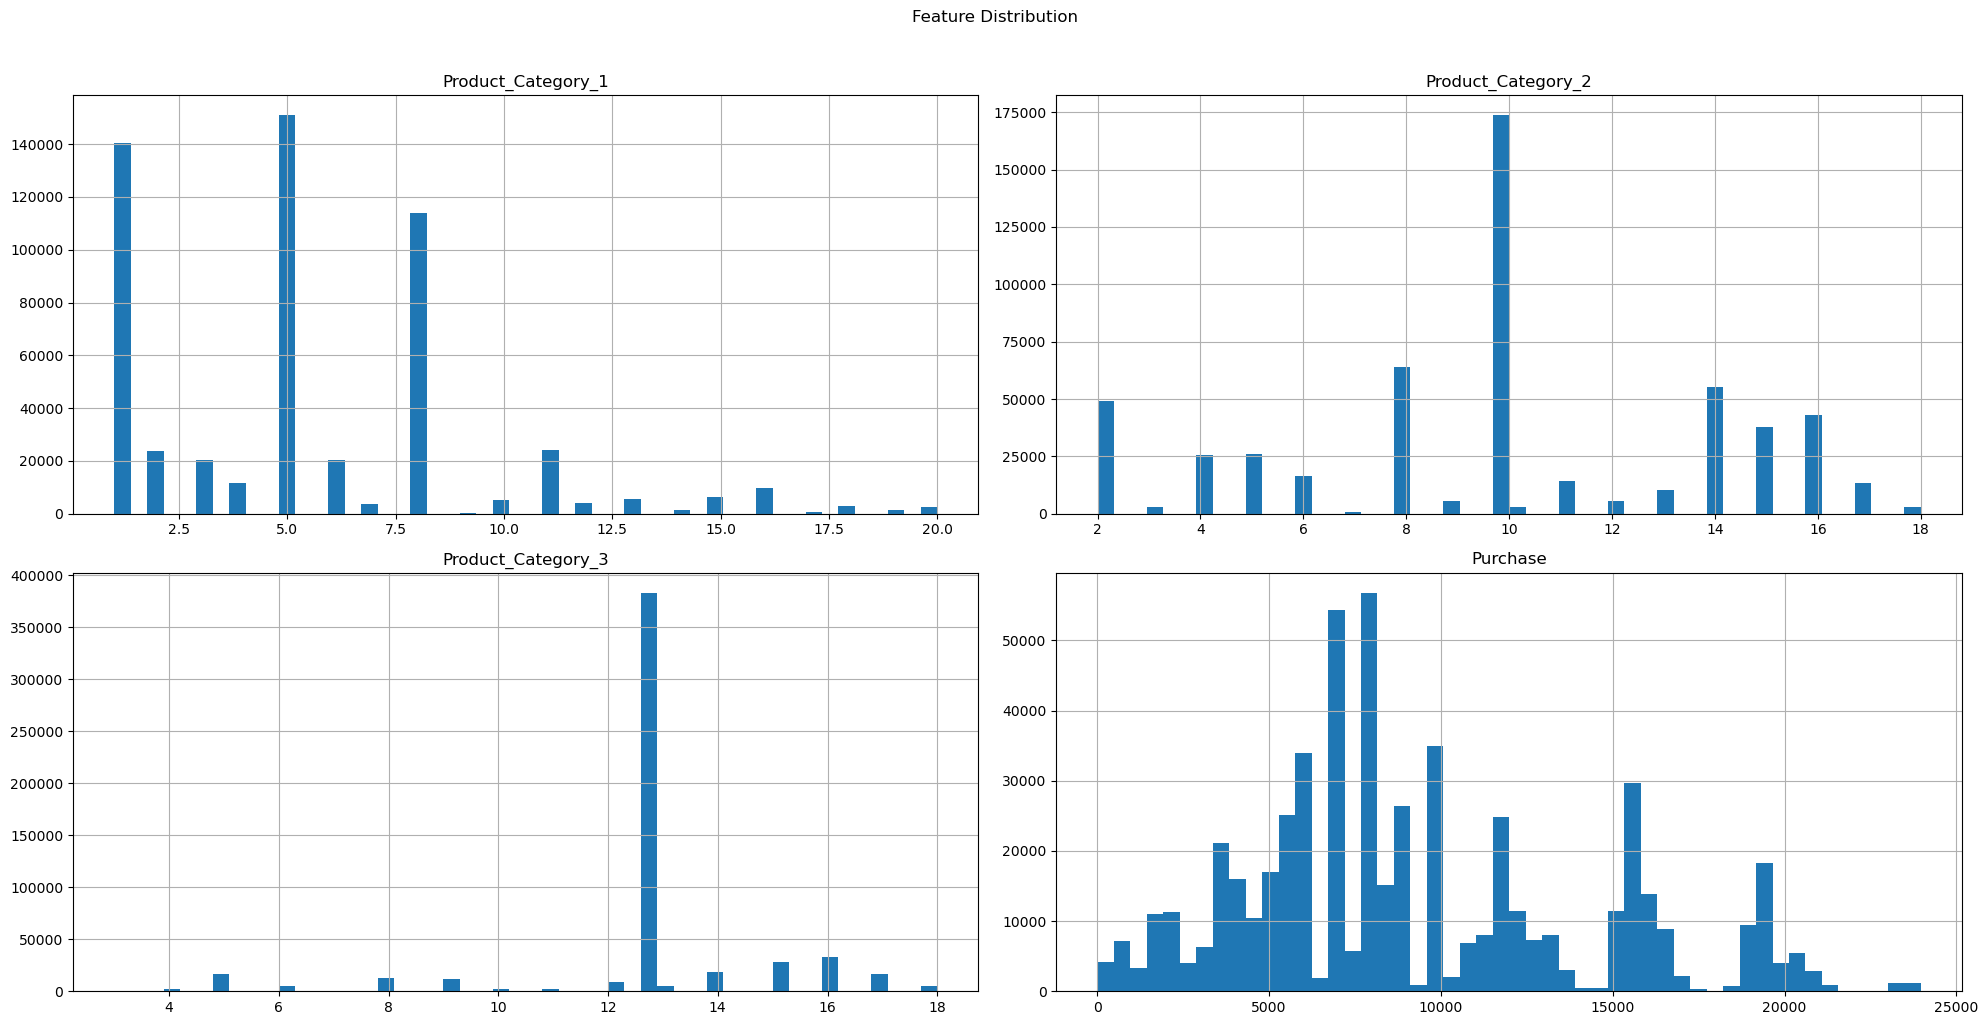

In [18]:
train_drop.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

#### UNIVARIATE ANALYSIS OF NUMERİCAL VARIABLES

In [19]:
numeric_list = []
numerics=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Num= train_drop.select_dtypes(include=numerics)
for i in Num:
    numeric_list.append(i)
print(numeric_list)

['Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [20]:
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True, color="orange") 


    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))


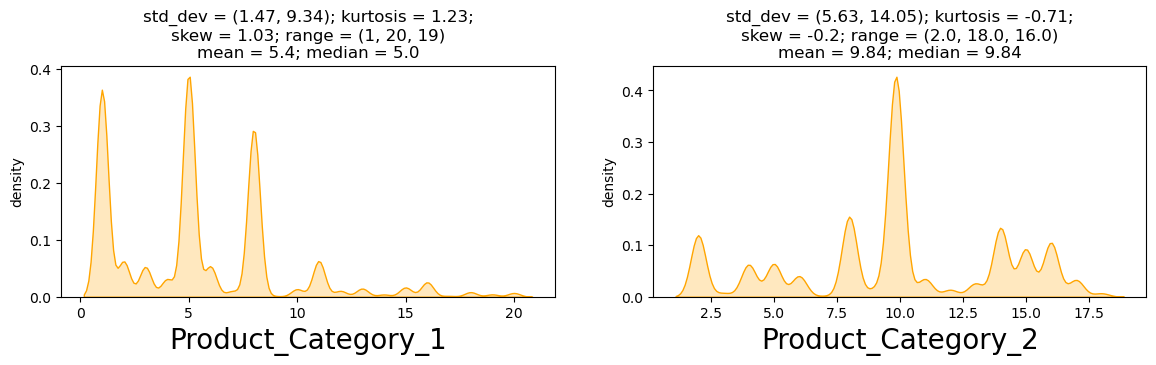

In [21]:
UVA_numeric(train_drop, numeric_list[0:2])

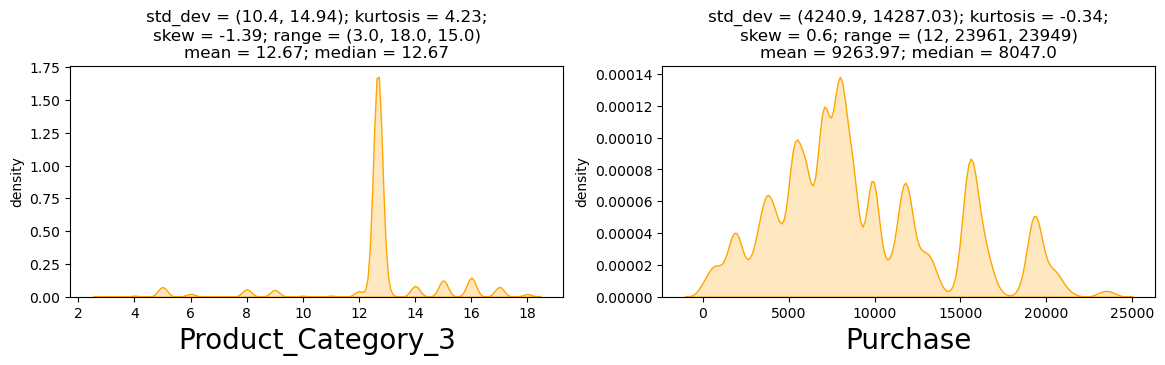

In [22]:
UVA_numeric(train_drop, numeric_list[2:4])

#### UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES

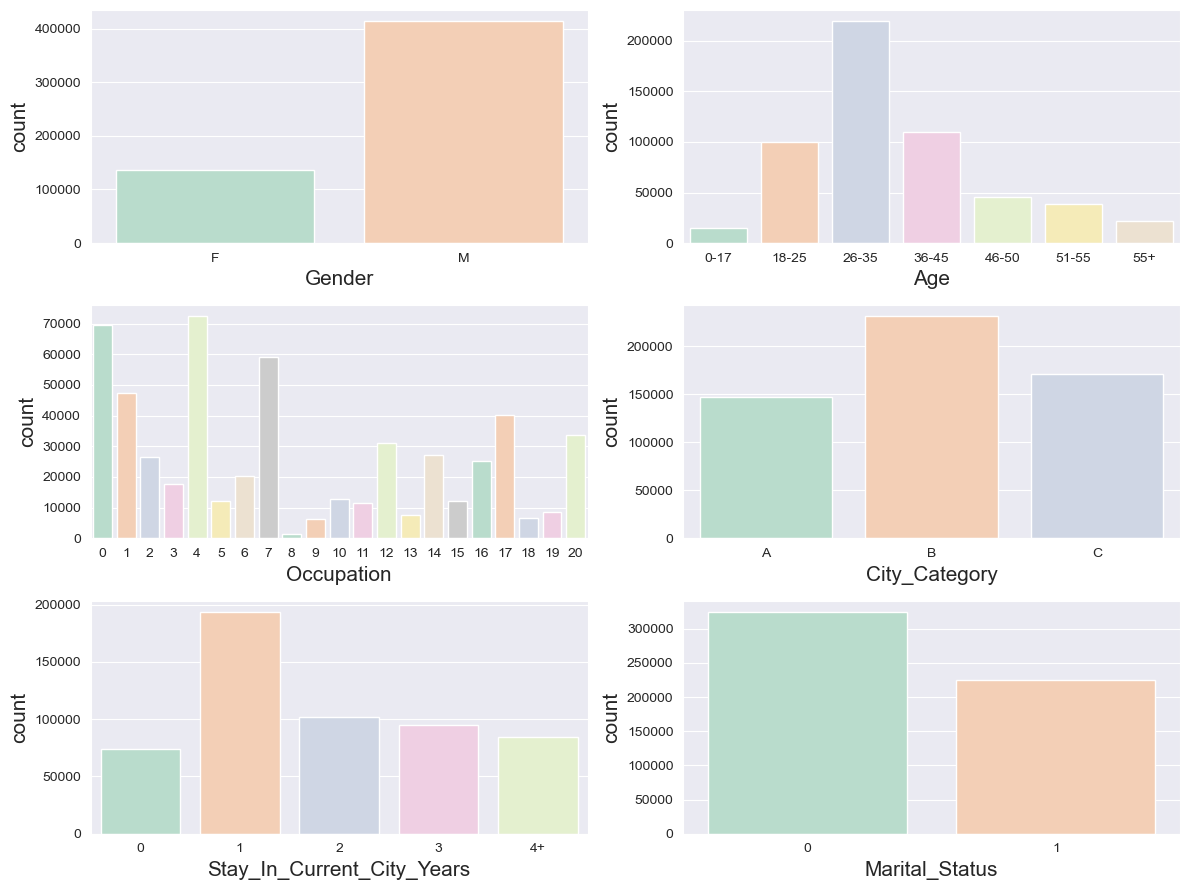

In [23]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
OrderedCols = train_drop.select_dtypes(include='category')
fig, ax = plt.subplots(3, 2, figsize=(12,9),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//2
    y = i%2
    sns.countplot(data=train_drop, x=col, ax=ax[x,y],palette='Pastel2')
    ax[x,y].xaxis.label.set_size(15)
    ax[x,y].yaxis.label.set_size(15)


plt.tight_layout()    
plt.show()

#### BIVARIATE ANALYSIS OF NUMERIC VARIABLES DEPEND ON PURCHASE(DEPENDEP VARIABLE)

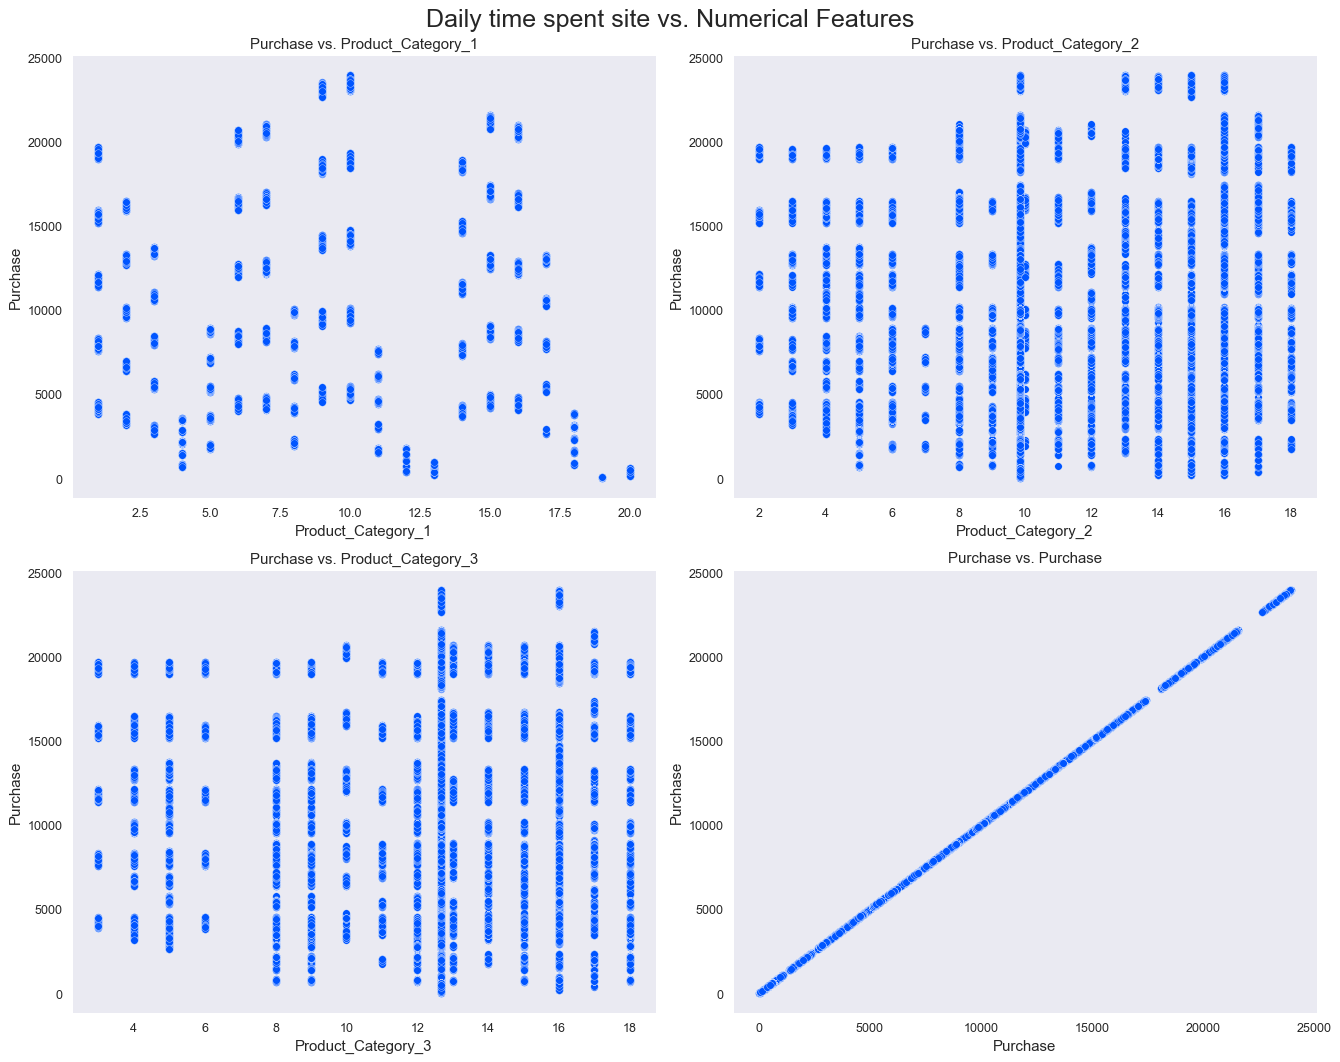

In [24]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(15,12), dpi=90)
target = 'Purchase'
c = '#0055ff'

for i in range(len(numeric_list)):
    row = i//2
    col = i%2
    ax[row,col].scatter(train_drop[numeric_list[i]], train_drop[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, numeric_list[i]), size = 12)
    ax[row,col].set_xlabel(numeric_list[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Daily time spent site vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

#### BIVARIATE ANALYSIS OF CATEGORICAL DEPEND ON PURCHASE

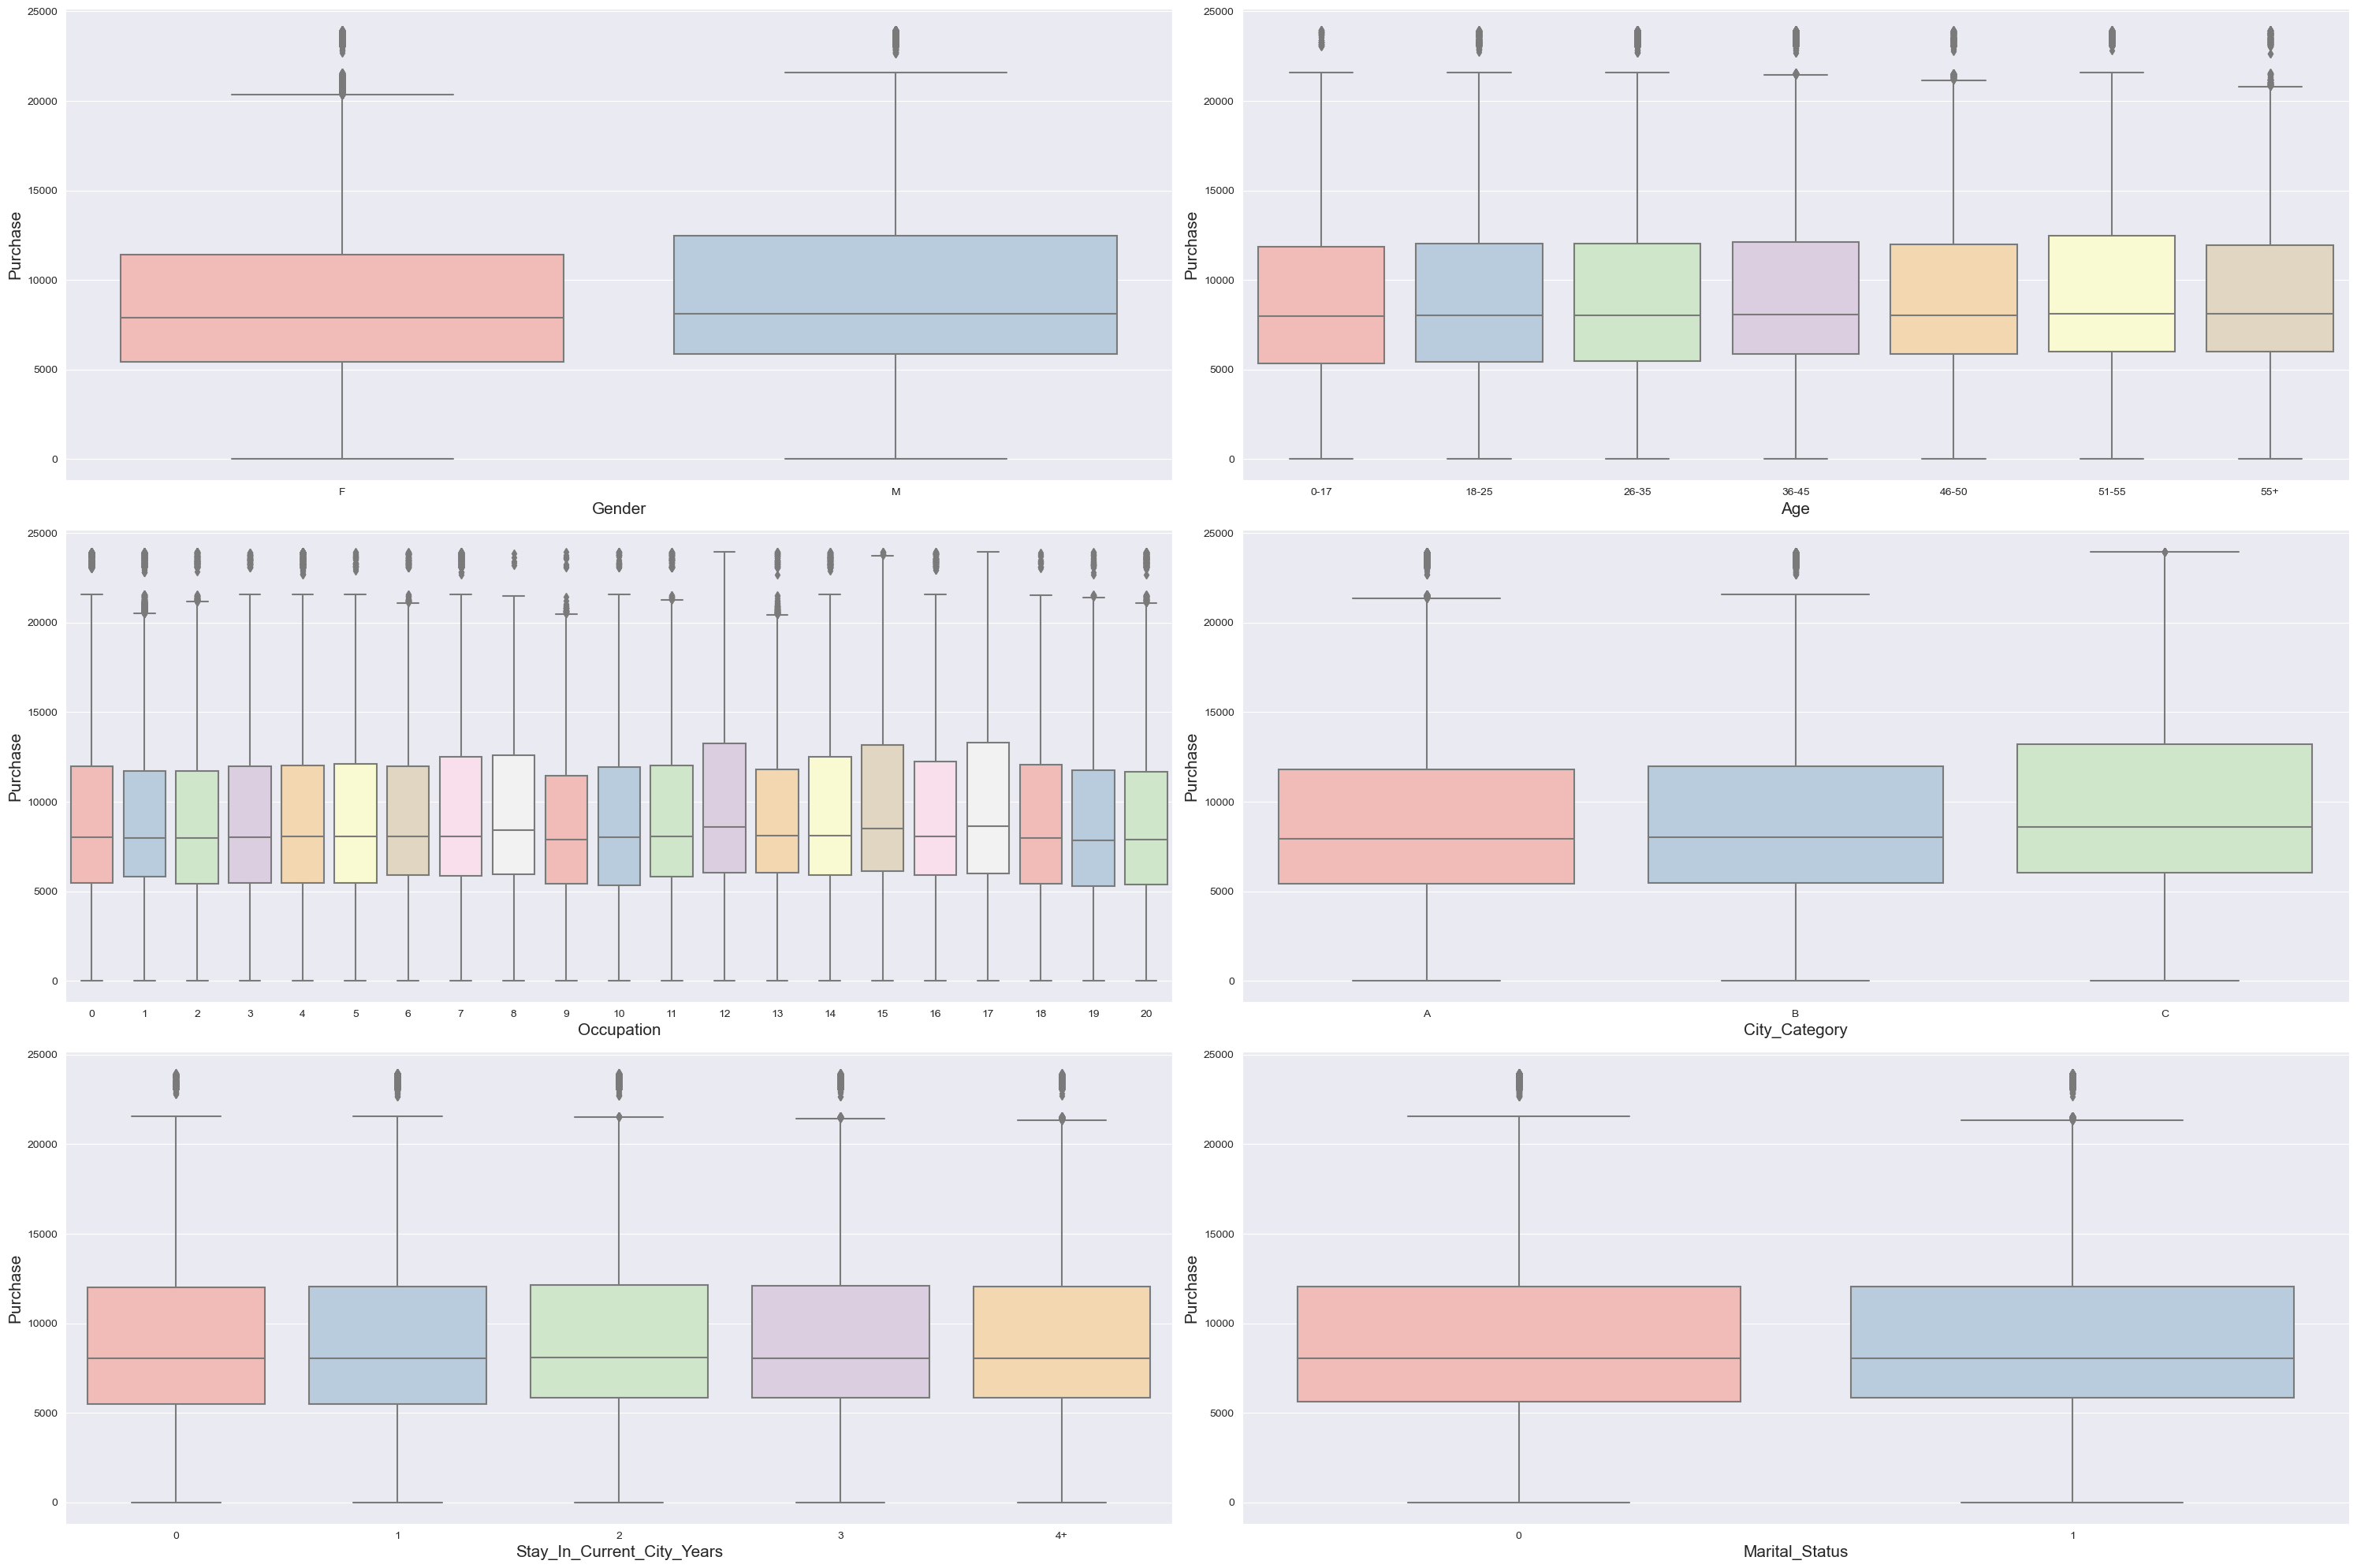

In [25]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
OrderedCols = train_drop.select_dtypes(include='category')
fig, ax = plt.subplots(3, 2, figsize=(30,20),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//2
    y = i%2

    sns.boxplot(data=train_drop, x=col, y='Purchase', ax=ax[x,y], palette='Pastel1')
    ax[x,y].xaxis.label.set_size(15)
    ax[x,y].yaxis.label.set_size(15)


plt.tight_layout()    
plt.show()

In [26]:
#!pip install dython

In [27]:
df_cor=train_drop[numeric_list]

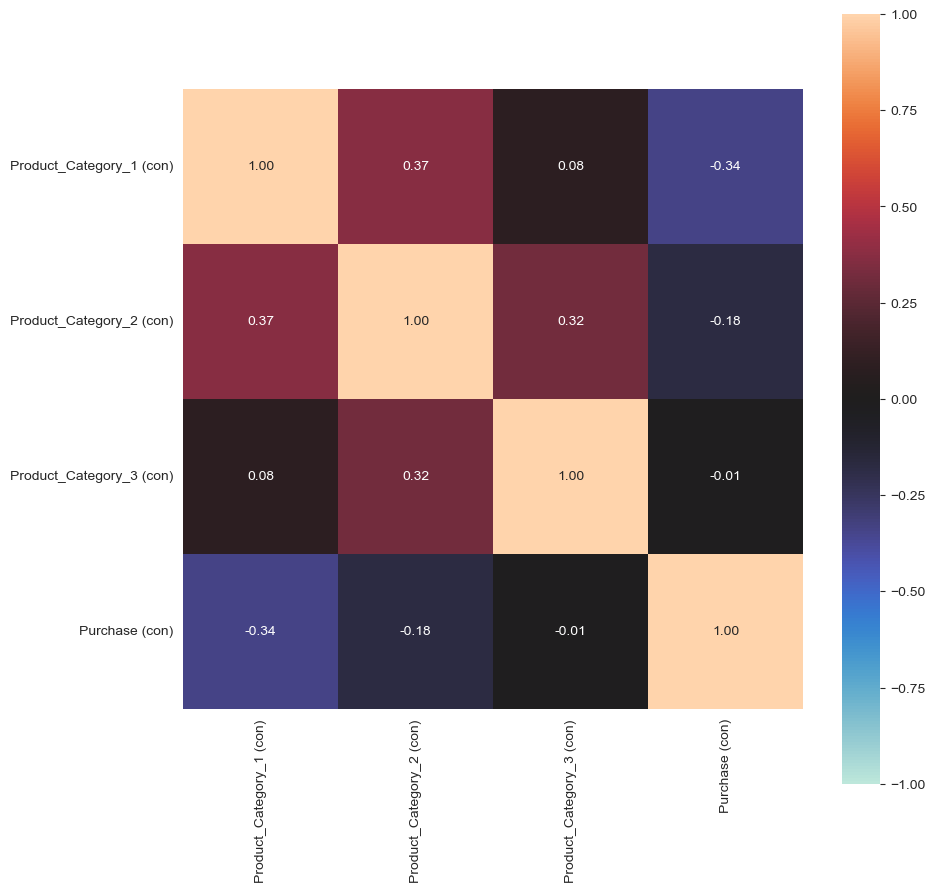

{'corr':                           Product_Category_1 (con)  Product_Category_2 (con)  \
 Product_Category_1 (con)                  1.000000                  0.373686   
 Product_Category_2 (con)                  0.373686                  1.000000   
 Product_Category_3 (con)                  0.082711                  0.320195   
 Purchase (con)                           -0.343703                 -0.179309   
 
                           Product_Category_3 (con)  Purchase (con)  
 Product_Category_1 (con)                  0.082711       -0.343703  
 Product_Category_2 (con)                  0.320195       -0.179309  
 Product_Category_3 (con)                  1.000000       -0.012261  
 Purchase (con)                           -0.012261        1.000000  ,
 'ax': <AxesSubplot:>}

In [28]:
from dython.nominal import associations
associations(df_cor,figsize=(10,10),mark_columns=True)

### FEATURE SCALING AND MODELLING WITH PIPELINE

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [30]:
y=train_drop['Purchase']

In [31]:
X= train_drop.drop('Purchase',axis=1)
X.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [33]:
from sklearn.compose import make_column_selector as selector
def test_pipeline(model):
    numeric_features = ['Product_Category_1','Product_Category_2', 'Product_Category_3']
    numeric_transformer = Pipeline(steps=[ ("scaler", StandardScaler())])

    categorical_features = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']
    categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])
    preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),("cat", categorical_transformer, categorical_features)])

    clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", model)])
    clf.fit(X_train,y_train)
    scores = cross_val_score(clf, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    scores = np.abs(np.mean(scores))
    pred = clf.predict(X_test)   
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(scores))

In [34]:
test_pipeline(LinearRegression(n_jobs=-1))

Results
MSE: 4680.550834056503
CV Score: 4687.361298804162


In [35]:
test_pipeline( GradientBoostingRegressor())

Results
MSE: 2994.8711412185867
CV Score: 2994.1929077428554


In [36]:
test_pipeline(DecisionTreeRegressor())

Results
MSE: 3339.3366494717543
CV Score: 3326.0999642145453


In [37]:
test_pipeline(AdaBoostRegressor(n_estimators=500, learning_rate = 0.001, random_state=1))

Results
MSE: 3760.5916666075864
CV Score: 3752.0710389766255


In [38]:
from xgboost import XGBRegressor
xgb=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
test_pipeline(xgb)

[13:42:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Results
MSE: 2941.6569885835534
CV Score: 2938.1215638169733


#### FINE TUNING OF BEST MODEL

#### TUNING WITH OPTUNA

In [39]:
#!pip install optuna
import optuna

In [40]:
# Tuning a model can last very long so taking sample make faster this 
df=train.sample(frac=0.05, replace=True, random_state=1)
df.shape

(27503, 10)

In [41]:
y=df['Purchase']

In [42]:
X=df.drop(['Purchase'],axis=1)
X.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
categorical_features = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']
numeric_features = ['Product_Category_1','Product_Category_2', 'Product_Category_3']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', dtype=np.int))
])

## Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features ),
        ('cat', categorical_transformer, categorical_features)
    ])
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [45]:
## Save feature names after one-hot encoding for feature importances plots
feature_names = list(preprocessor.named_transformers_['cat'].named_steps['onehot'] \
                            .get_feature_names(input_features=categorical_features))
feature_names = feature_names + numeric_features

In [46]:
# Build model with parameters for Optuna
def objective(trial):

    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.5,0.7, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.5,0.7,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.001,0.01,0.014, 0.02]),
        'n_estimators': trial.suggest_categorical('n_estimators', [300,500,1000]),
        'max_depth': trial.suggest_categorical('max_depth', [3,5,7,10]),
        'random_state': trial.suggest_categorical('random_state', [2023]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 12),
    }
    model =XGBRegressor(**param)  
    
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, preds,squared=False)
    
    return rmse

In [47]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-04 13:44:12,986] A new study created in memory with name: no-name-1aa2d088-da82-43b7-9786-df1507202989
[I 2023-04-04 13:44:24,616] Trial 0 finished with value: 2932.1801917069374 and parameters: {'lambda': 0.0033569466322002682, 'alpha': 0.006903863340551772, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.014, 'n_estimators': 1000, 'max_depth': 10, 'random_state': 2023, 'min_child_weight': 4}. Best is trial 0 with value: 2932.1801917069374.
[I 2023-04-04 13:44:29,562] Trial 1 finished with value: 2922.0951295721293 and parameters: {'lambda': 0.4086119581195918, 'alpha': 0.26903242293890567, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.02, 'n_estimators': 500, 'max_depth': 7, 'random_state': 2023, 'min_child_weight': 2}. Best is trial 1 with value: 2922.0951295721293.
[I 2023-04-04 13:44:39,007] Trial 2 finished with value: 2920.3466825060696 and parameters: {'lambda': 5.786347780373445, 'alpha': 2.4073683648077613, 'colsample_bytree': 0.5, 'su

Number of finished trials: 30
Best trial: {'lambda': 0.1472150762683935, 'alpha': 0.9450928033749191, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.02, 'n_estimators': 1000, 'max_depth': 7, 'random_state': 2023, 'min_child_weight': 12}


In [48]:
study.trials_dataframe()

number        value             datetime_start          datetime_complete  \
0        0  2932.180192 2023-04-04 13:44:12.987923 2023-04-04 13:44:24.616322   
1        1  2922.095130 2023-04-04 13:44:24.617373 2023-04-04 13:44:29.561876   
2        2  2920.346683 2023-04-04 13:44:29.562727 2023-04-04 13:44:39.007096   
3        3  3377.944401 2023-04-04 13:44:39.008206 2023-04-04 13:44:41.034872   
4        4  2941.179431 2023-04-04 13:44:41.036188 2023-04-04 13:44:51.451202   
5        5  7044.499328 2023-04-04 13:44:51.452218 2023-04-04 13:44:55.446460   
6        6  3217.035066 2023-04-04 13:44:55.447271 2023-04-04 13:44:57.168395   
7        7  2940.032843 2023-04-04 13:44:57.169452 2023-04-04 13:45:01.987273   
8        8  3007.010314 2023-04-04 13:45:01.988082 2023-04-04 13:45:06.452411   
9        9  3018.890825 2023-04-04 13:45:06.453245 2023-04-04 13:45:09.410659   
10      10  2917.837316 2023-04-04 13:45:09.411589 2023-04-04 13:45:16.339902   
11      11  2917.252599 2023-04-04 13:45:16.340717 2023-04-04 13:45:24.680856   
12      12  2918.372826 2023-04-04 13:45:24.681812 2023-04-04 13:45:31.102878   
13      13  2918.101764 2023-04-04 13:45:31.103891 2023-04-04 13:45:37.939843   
14      14  2919.632322 2023-04-04 13:45:37.941057 2023-04-04 13:45:44.932846   
15      15  5080.491975 2023-04-04 13:45:44.933975 2023-04-04 13:45:53.652600   
16      16  2915.843703 2023-04-04 13:45:53.653452 2023-04-04 13:46:00.742430   
17      17  2919.300362 2023-04-04 13:46:00.743451 2023-04-04 13:46:07.145800   
18      18  2936.132759 2023-04-04 13:46:07.147153 2023-04-04 13:46:12.840394   
19      19  7170.913948 2023-04-04 13:46:12.841199 2023-04-04 13:46:15.212145   
20      20  2919.169575 2023-04-04 13:46:15.213735 2023-04-04 13:46:21.326921   
21      21  2917.779051 2023-04-04 13:46:21.327757 2023-04-04 13:46:27.735956   
22      22  2919.654865 2023-04-04 13:46:27.737320 2023-04-04 13:46:34.007876   
23      23  2918.374315 2023-04-04 13:46:34.008772 2023-04-04 13:46:40.084955   
24      24  2918.602556 2023-04-04 13:46:40.085846 2023-04-04 13:46:47.166331   
25      25  2918.274425 2023-04-04 13:46:47.167448 2023-04-04 13:46:55.696961   
26      26  2918.248316 2023-04-04 13:46:55.698214 2023-04-04 13:47:02.165856   
27      27  5609.346219 2023-04-04 13:47:02.166686 2023-04-04 13:47:06.185880   
28      28  3134.877918 2023-04-04 13:47:06.186793 2023-04-04 13:47:08.274609   
29      29  2984.658619 2023-04-04 13:47:08.275547 2023-04-04 13:47:13.845973   

                 duration  params_alpha  params_colsample_bytree  \
0  0 days 00:00:11.628399      0.006904                      0.3   
1  0 days 00:00:04.944503      0.269032                      0.5   
2  0 days 00:00:09.444369      2.407368                      0.5   
3  0 days 00:00:02.026666      0.006068                      0.3   
4  0 days 00:00:10.415014      0.004028                      1.0   
5  0 days 00:00:03.994242      0.013114                      0.7   
6  0 days 00:00:01.721124      1.293235                      1.0   
7  0 days 00:00:04.817821      0.120598                      1.0   
8  0 days 00:00:04.464329      0.118604                      0.7   
9  0 days 00:00:02.957414      0.283835                      1.0   
10 0 days 00:00:06.928313      9.722027                      0.5   
11 0 days 00:00:08.340139      9.934970                      0.5   
12 0 days 00:00:06.421066      7.600754                      0.5   
13 0 days 00:00:06.835952      9.439447                      0.5   
14 0 days 00:00:06.991789      2.026198                      0.5   
15 0 days 00:00:08.718625      8.128594                      0.5   
16 0 days 00:00:07.088978      0.945093                      0.5   
17 0 days 00:00:06.402349      0.947336                      0.5   
18 0 days 00:00:05.693241      0.595439                      0.3   
19 0 days 00:00:02.370946      3.448921                      0.7   
20 0 days 00:00:06.113186      0.001111                      0.5

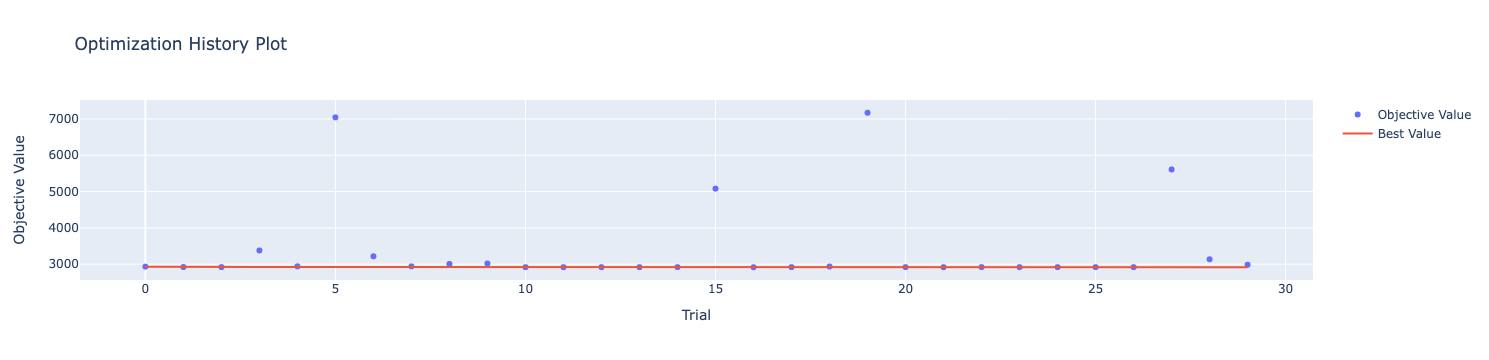

In [49]:
optuna.visualization.plot_optimization_history(study)

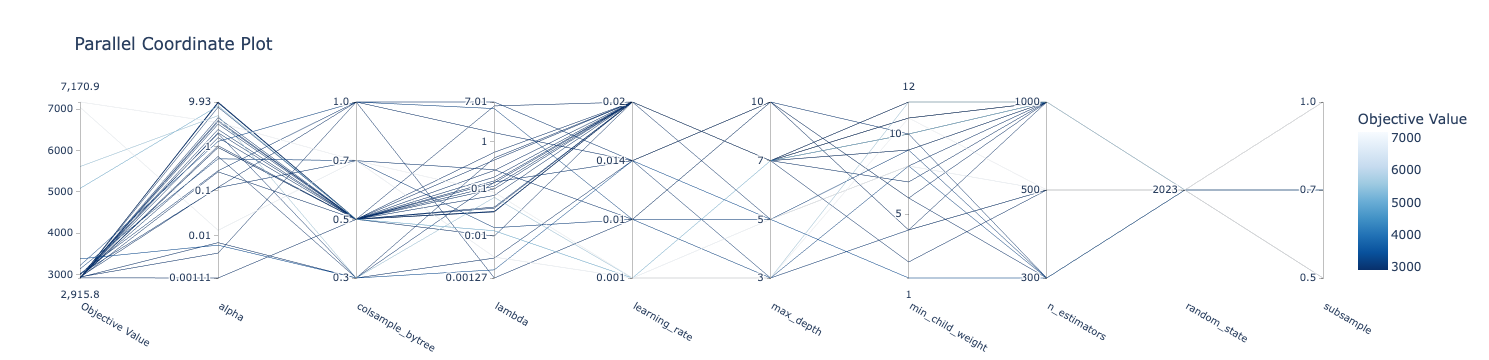

In [50]:
optuna.visualization.plot_parallel_coordinate(study)

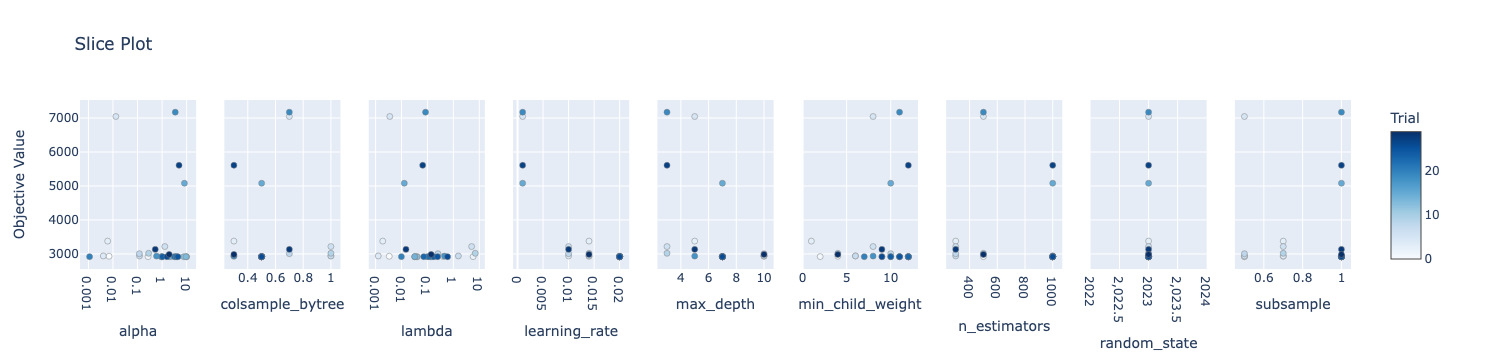

In [51]:
optuna.visualization.plot_slice(study)

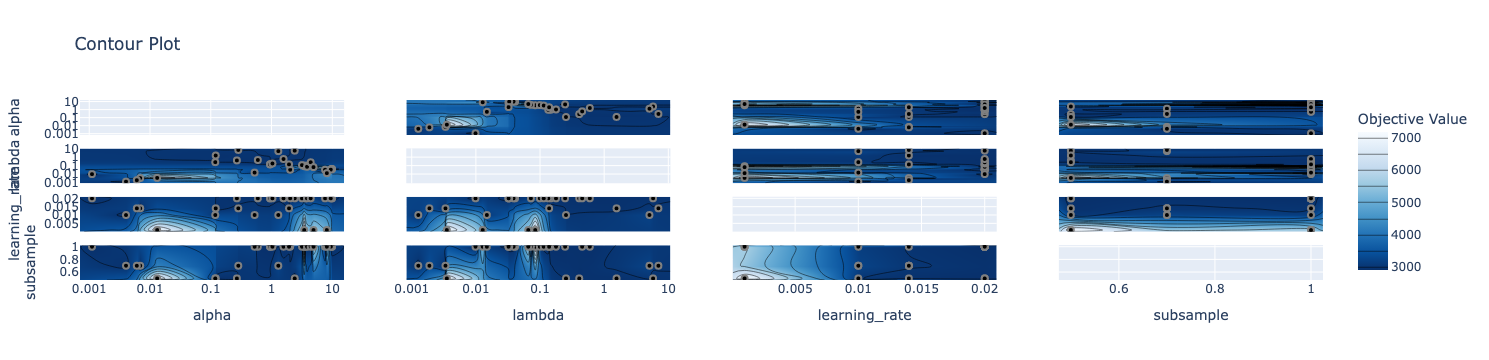

In [52]:
optuna.visualization.plot_contour(study, params=['alpha',
                            #'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample'])

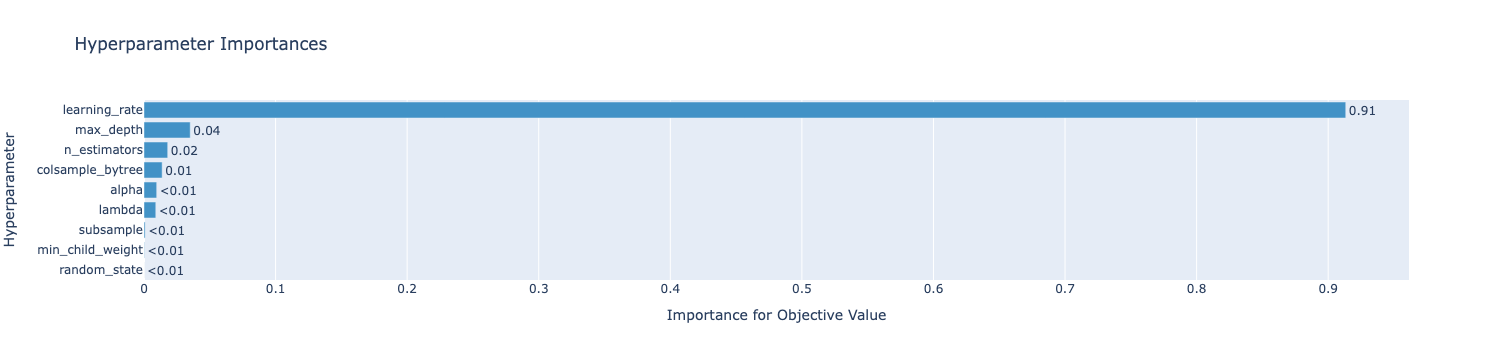

In [53]:
optuna.visualization.plot_param_importances(study)

#### MODEL WITH BEST PARAMS OF OPTUNA

In [54]:
y=train['Purchase']

In [55]:
X1=train.drop('Purchase',axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42, test_size=0.25)

In [57]:
categorical_features = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']
numeric_features = ['Product_Category_1','Product_Category_2', 'Product_Category_3']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', dtype=np.int))
])

## Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features ),
        ('cat', categorical_transformer, categorical_features)
    ])
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [59]:
Best_trial = study.best_trial.params
Best_trial

{'lambda': 0.1472150762683935,
 'alpha': 0.9450928033749191,
 'colsample_bytree': 0.5,
 'subsample': 1.0,
 'learning_rate': 0.02,
 'n_estimators': 1000,
 'max_depth': 7,
 'random_state': 2023,
 'min_child_weight': 12}

In [60]:
model=XGBRegressor(**Best_trial)
model.fit(X_train,y_train)

[13:42:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regress

XGBRegressor(alpha=0.9450928033749191, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.1472150762683935,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=12, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, ...)

In [61]:
preds = model.predict(X_test)

In [62]:
rmse = mean_squared_error(y_test, preds,squared=False)
print("MSE:", (rmse))

MSE: 2893.577638086407


#### FEATURE IMPORTANCE WITH SHAPLEY

In [63]:
df1=train_drop.copy()

In [64]:
df0=pd.get_dummies(data=df1, columns=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status'], drop_first=True)
df4=df0.drop(['Product_Category_1','Product_Category_2', 'Product_Category_3'],axis=1)

In [65]:
col_names = ['Product_Category_1','Product_Category_2', 'Product_Category_3']
features = df1[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df5=pd.DataFrame(features,columns=['Product_Category_1','Product_Category_2', 'Product_Category_3'])

In [66]:
df3= pd.concat([df5, df4],axis=1)
df3.head()

Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0           -0.610809        4.221533e-16       -7.819065e-16      8370   
1           -1.118912       -9.131340e-01        5.862050e-01     15200   
2            1.675656        4.221533e-16       -7.819065e-16      1422   
3            1.675656        9.880753e-01       -7.819065e-16      1057   
4            0.659449        4.221533e-16       -7.819065e-16      7969   

   Gender_M  Age_18-25  Age_26-35  Age_36-45  Age_46-50  Age_51-55  ...  \
0         0          0          0          0          0          0  ...   
1         0          0          0          0          0          0  ...   
2         0          0          0          0          0          0  ...   
3         0          0          0          0          0          0  ...   
4         1          0          0          0          0          0  ...   

   Occupation_18  Occupation_19  Occupation_20  City_Category_B  \
0              0              0              0                0   
1              0              0              0                0   
2              0              0              0                0   
3              0              0              0                0   
4              0              0              0                0   

   City_Category_C  Stay_In_Current_City_Years_1  \
0                0                             0   
1                0                             0   
2                0                             0   
3                0                             0   
4                1                             0   

   Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
0                             1                             0   
1                             1                             0   
2                             1                             0   
3                             1                             0   
4                             0                             0   

   Stay_In_Current_City_Years_4+  Marital_Status_1  
0                              0                 0  
1                              0                 0  
2                              0                 0  
3                              0                 0  
4                              1                 0  

[5 rows x 38 columns]

In [67]:
y=df3['Purchase']

In [68]:
X= df3.drop('Purchase',axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [70]:
import shap

In [71]:
from shap.maskers import Independent
from shap import TreeExplainer, Explanation
from shap.plots import waterfall
xgb_explainer = shap.TreeExplainer(model, X_train, feature_names=X_train.columns.tolist())


In [72]:
shap_explainer_values = xgb_explainer(X_train, y_train)

100%|===================| 412518/412551 [155:21<00:00]        

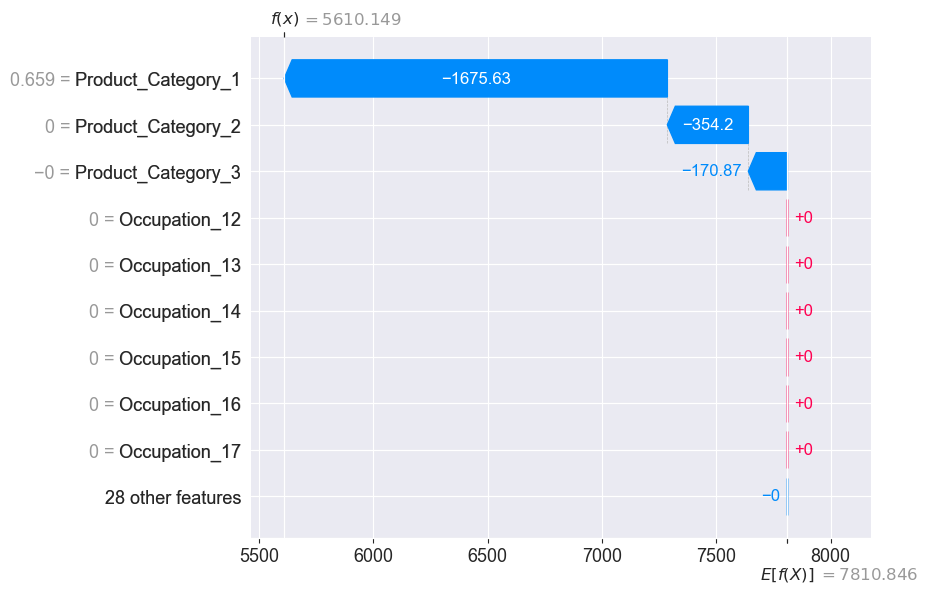

In [73]:
shap.waterfall_plot(shap_explainer_values[0])

In [74]:
shap.plots.force(shap_explainer_values[0:100])

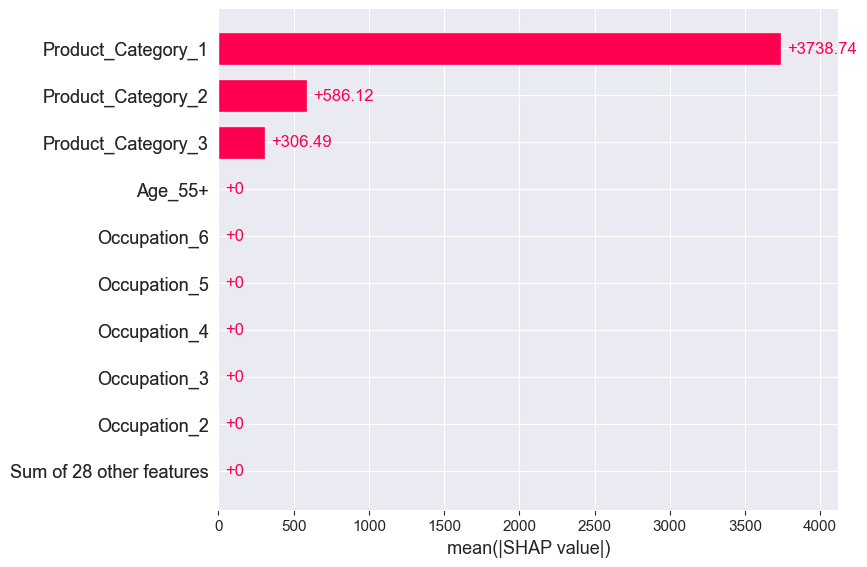

In [75]:
shap.plots.bar(shap_explainer_values)

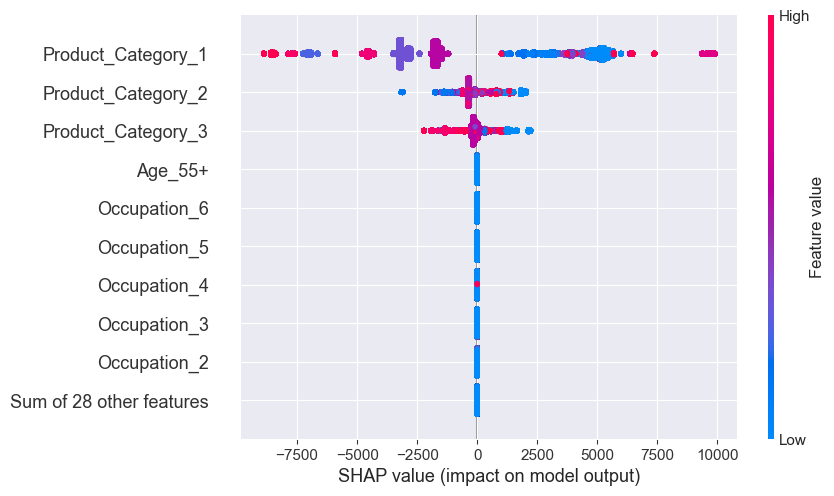

In [76]:
shap.plots.beeswarm(shap_explainer_values)

#### SAVING MODEL

In [77]:
import joblib
from joblib import dump, load
# Save a model to file
dump(model, filename="xgbmodel_1.joblib") 


['xgbmodel_1.joblib']

- Import a saved joblib model

<pre><code>loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")<pre><code>

- Make and evaluate joblib predictions

<pre><code>joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)<pre><code>